In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib as mpl
import matplotlib.font_manager as fm
# 지도 출력을 위한 라이브러리 folium을 import 합니다.
import folium

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
year_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/파이썬  프로젝트/경찰청_5대 범죄 발생건수.csv',encoding='euc-kr')

In [ ]:
year_df.head()

,구분,2016,2017,2018,2019,2020,2021
0,살인,906,818,791,775,720,652
1,강도,1149,965,818,798,662,495
2,강간 강제추행,22193,24106,23467,23531,21702,20269
3,절도,202874,183565,176613,186649,179315,166251
4,폭력,308776,292524,286599,287257,265148,232018


In [ ]:
# 인덱스를 범죄분류로 변경 후 범죄분류열 삭제
year_df.set_index(keys=year_df['구분'], inplace=True)
year_df.drop(['구분'], inplace=True, axis=1)
year_df.head()

,2016,2017,2018,2019,2020,2021
구분,,,,,,
살인,906,818,791,775,720,652
강도,1149,965,818,798,662,495
강간 강제추행,22193,24106,23467,23531,21702,20269
절도,202874,183565,176613,186649,179315,166251
폭력,308776,292524,286599,287257,265148,232018


In [ ]:
# 합계 프레임 추가
summary = year_df.sum()
summary = pd.DataFrame(summary)
summary

,0
2016,535898
2017,501978
2018,488288
2019,499010
2020,467547
2021,419685


In [ ]:
# 인덱스를 열로 변환
summary = summary.reset_index()
summary.head()

,index,0
0,2016,535898
1,2017,501978
2,2018,488288
3,2019,499010
4,2020,467547


In [ ]:
# 열 이름 변경하기
summary.rename(columns={'index':'연도'},inplace=True)
summary.rename(columns={0:'합계'},inplace=True)
summary

,연도,합계
0,2016,535898
1,2017,501978
2,2018,488288
3,2019,499010
4,2020,467547
5,2021,419685


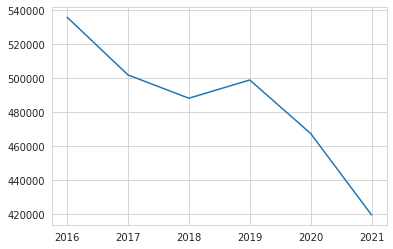

In [ ]:
plt.plot(summary['연도'], summary['합계'])

In [ ]:
cctv_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/파이썬  프로젝트/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv',encoding='euc-kr')

In [ ]:
# 인덱스를 구분으로 변경 후 구분열 삭제
cctv_df.set_index(keys=cctv_df['구분'], inplace=True)
cctv_df.drop(['구분'], inplace=True, axis=1)
# 결측값 있는 열 삭제
cctv_df = cctv_df.dropna(axis=1)
cctv_df.loc['계']

총계                    91,341
2013년 이전\n설치된 CCTV     2,804
2013년                  3,097
2014년                  3,981
2015년                  6,576
2016년                  8,850
2017년                 11,566
2018년                 11,024
2019년                 13,151
2020년                 11,912
2021년                  9,144
2022년                  9,236
Name: 계, dtype: object

In [ ]:
# 총 갯수만 출력
cctv_total = pd.DataFrame(cctv_df.loc['계'])
cctv_total.head()

,계
총계,"91,341"
2013년 이전\n설치된 CCTV,"2,804"
2013년,"3,097"
2014년,"3,981"
2015년,"6,576"


In [ ]:
# 이외 데이터 삭제
cctv_total = cctv_total.drop(['총계','2013년 이전\n설치된 CCTV'], axis=0)
cctv_total.head()

,계
2013년,"3,097"
2014년,"3,981"
2015년,"6,576"
2016년,"8,850"
2017년,"11,566"


In [ ]:
# 인덱스를 열로 변환
cctv_total = cctv_total.reset_index()
cctv_total.head()

,index,계
0,2013년,"3,097"
1,2014년,"3,981"
2,2015년,"6,576"
3,2016년,"8,850"
4,2017년,"11,566"


In [ ]:
# 열 이름 변경하기
cctv_total.rename(columns={'index':'연도'},inplace=True)
cctv_total.head()

,연도,계
0,2013년,"3,097"
1,2014년,"3,981"
2,2015년,"6,576"
3,2016년,"8,850"
4,2017년,"11,566"


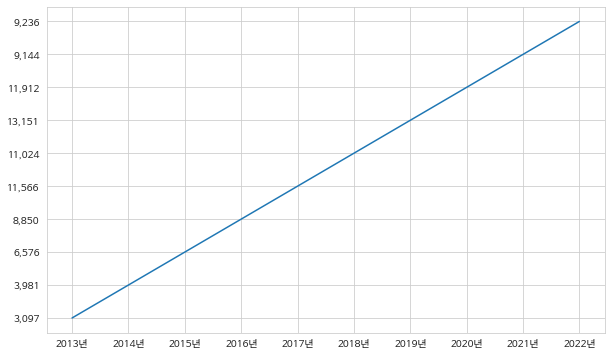

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,6))
plt.plot(cctv_total['연도'], cctv_total['계'])

In [ ]:
region_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/파이썬  프로젝트/지역.csv')

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
region_df.head()

,범죄분류,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,절도,41293,15892,8324,9219,4877,6282,2342,583,41511,5278,5569,8108,5447,5228,8690,12483,3229
1,장물,411,461,67,107,32,39,16,2,306,20,18,26,191,20,110,105,3
2,손괴,11037,3720,2647,3470,1484,1476,885,170,14536,2053,1836,2420,1543,1817,2731,3509,1224
3,살인,147,64,48,35,12,22,16,6,186,33,37,50,25,38,51,67,21
4,강도,172,102,39,74,33,43,12,3,213,27,30,33,28,21,49,76,35


In [ ]:
# 인덱스를 범죄분류로 변경 후 범죄분류열 삭제
region_df.set_index(keys=region_df['범죄분류'], inplace=True)
region_df.drop(['범죄분류'], inplace=True, axis=1)
region_df.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
범죄분류,,,,,,,,,,,,,,,,,
절도,41293,15892,8324,9219,4877,6282,2342,583,41511,5278,5569,8108,5447,5228,8690,12483,3229
장물,411,461,67,107,32,39,16,2,306,20,18,26,191,20,110,105,3
손괴,11037,3720,2647,3470,1484,1476,885,170,14536,2053,1836,2420,1543,1817,2731,3509,1224
살인,147,64,48,35,12,22,16,6,186,33,37,50,25,38,51,67,21
강도,172,102,39,74,33,43,12,3,213,27,30,33,28,21,49,76,35


In [ ]:
# 합계 프레임 추가
df1 = region_df.sum()
df1 = pd.DataFrame(df1)
df1

,0
서울,123334
부산,46039
대구,26133
인천,35532
광주,15597
대전,17744
울산,7903
세종,1568
경기,134729
강원,18259


In [ ]:
# 인덱스를 열로 변환
df1 = df1.reset_index()
df1.head()

,index,0
0,서울,123334
1,부산,46039
2,대구,26133
3,인천,35532
4,광주,15597


In [ ]:
# 열 이름 변경하기
df1.rename(columns={'index':'지역'},inplace=True)
df1.rename(columns={0:'합계'},inplace=True)
df1.head()

,지역,합계
0,서울,123334
1,부산,46039
2,대구,26133
3,인천,35532
4,광주,15597


In [ ]:
# '합계' 기준으로 내림차순 정렬
df1.sort_values(by='합계', ascending=False, inplace = True)

In [ ]:
# sum 행 추가
region_df.loc[28] = np.sum(region_df, axis=0)
region_df.tail()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
범죄분류,,,,,,,,,,,,,,,,,
마약류관리에관한법률(향정),1638,1091,300,717,94,93,79,5,1337,154,116,186,69,55,149,678,37
성매매알선등행위의처벌에관한법률,1828,1210,463,1286,217,384,59,9,2289,105,118,424,713,67,204,867,172
아동·청소년의성보호에관한법률(성매수등),80,77,69,112,32,47,5,0,175,10,19,13,28,15,15,45,3
아동·청소년의성보호에관한법률(음란물등),59,80,41,12,21,35,5,2,96,9,11,15,10,16,47,22,10
28,123334,46039,26133,35532,15597,17744,7903,1568,134729,18259,16379,22270,17277,17978,25284,38150,10318


In [ ]:
# 합계 인덱스명 변경
region_df.rename(index={28: '합계'}, inplace=True)
region_df.tail()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
범죄분류,,,,,,,,,,,,,,,,,
마약류관리에관한법률(향정),1638,1091,300,717,94,93,79,5,1337,154,116,186,69,55,149,678,37
성매매알선등행위의처벌에관한법률,1828,1210,463,1286,217,384,59,9,2289,105,118,424,713,67,204,867,172
아동·청소년의성보호에관한법률(성매수등),80,77,69,112,32,47,5,0,175,10,19,13,28,15,15,45,3
아동·청소년의성보호에관한법률(음란물등),59,80,41,12,21,35,5,2,96,9,11,15,10,16,47,22,10
합계,123334,46039,26133,35532,15597,17744,7903,1568,134729,18259,16379,22270,17277,17978,25284,38150,10318


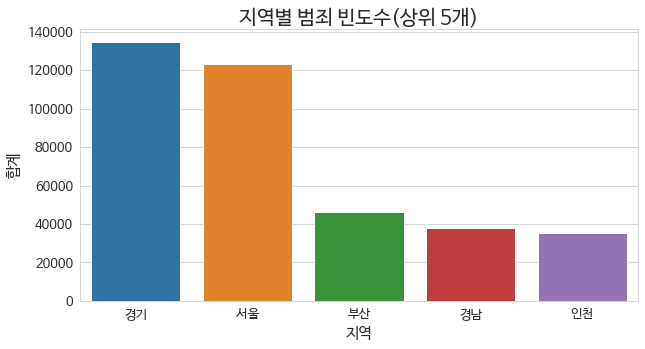

In [ ]:
region = df1['지역'].tolist()

plt.figure(figsize = (10, 5)) # 그래프 크기 설정
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 지정(맑은 고딕)
plt.title('지역별 범죄 빈도수(상위 5개)', fontsize=20) # 그래프 제목 설정

sns.set_style('darkgrid') # 그래프 스타일 지정
sns.barplot(data=df1, x='지역', y ='합계', order=region[:5])

plt.ylabel('합계', fontsize = 15)
plt.xlabel('지역', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

In [ ]:
place_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/파이썬  프로젝트/장소.csv')
place_df.head()

,범죄분류,아파트_연립_다세대,단독주택,고속도로,노상,상점,시장노점,숙박업소_목욕탕,유흥접객업소,사무실,...,학교,금융기관,의료기관,종교기관,산야,해상,부대,구금장소,공지,기타
0,절도,7038,9045,144,36808,20111,1803,3559,9985,3096,...,1005,4276,1300,1051,2276,92,21,7,32,74897
1,장물,63,71,0,649,225,38,13,71,99,...,26,20,5,2,0,10,1,0,1,438
2,손괴,3010,2698,26,21304,749,273,620,2064,666,...,87,67,91,141,1125,67,1,4,13,22917
3,살인,182,161,2,136,4,1,34,40,21,...,1,1,9,3,7,5,0,0,0,234
4,강도,83,87,1,261,119,5,71,62,25,...,5,10,1,5,7,1,0,0,0,227


In [ ]:
# 인덱스를 범죄분류로 변경 후 범죄분류열 삭제
place_df.set_index(keys=place_df['범죄분류'], inplace=True)
place_df.drop(['범죄분류'], inplace=True, axis=1)
place_df.head()

,아파트_연립_다세대,단독주택,고속도로,노상,상점,시장노점,숙박업소_목욕탕,유흥접객업소,사무실,공장,...,학교,금융기관,의료기관,종교기관,산야,해상,부대,구금장소,공지,기타
범죄분류,,,,,,,,,,,,,,,,,,,,,
절도,7038,9045,144,36808,20111,1803,3559,9985,3096,1022,...,1005,4276,1300,1051,2276,92,21,7,32,74897
장물,63,71,0,649,225,38,13,71,99,91,...,26,20,5,2,0,10,1,0,1,438
손괴,3010,2698,26,21304,749,273,620,2064,666,107,...,87,67,91,141,1125,67,1,4,13,22917
살인,182,161,2,136,4,1,34,40,21,3,...,1,1,9,3,7,5,0,0,0,234
강도,83,87,1,261,119,5,71,62,25,3,...,5,10,1,5,7,1,0,0,0,227


In [ ]:
# 합계 프레임 추가
df2 = place_df.sum()
df2 = pd.DataFrame(df2)
df2.head()

,0
아파트_연립_다세대,38513
단독주택,34692
고속도로,528
노상,154083
상점,26529


In [ ]:
# 인덱스를 열로 변환
df2 = df2.reset_index()
df2.head()

,index,0
0,아파트_연립_다세대,38513
1,단독주택,34692
2,고속도로,528
3,노상,154083
4,상점,26529


In [ ]:
# 열 이름 변경하기
df2.rename(columns={'index':'장소'},inplace=True)
df2.rename(columns={0:'합계'},inplace=True)
df2.head()

,장소,합계
0,아파트_연립_다세대,38513
1,단독주택,34692
2,고속도로,528
3,노상,154083
4,상점,26529


In [ ]:
# '합계' 기준으로 내림차순 정렬
df2.sort_values(by='합계', ascending=False, inplace = True)
df2.head()

,장소,합계
26,기타,209994
3,노상,154083
0,아파트_연립_다세대,38513
7,유흥접객업소,37732
1,단독주택,34692


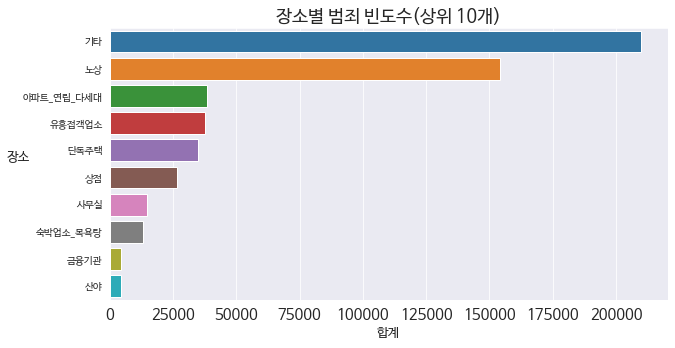

In [ ]:
place = df2['장소'].tolist()

plt.figure(figsize = (10,5))
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 지정(맑은 고딕)
plt.title('장소별 범죄 빈도수(상위 10개)', fontsize = 18)

sns.barplot(data=df2, y='장소', x='합계', order=place[:10])
sns.set_style('whitegrid') # 그래프 스타일 지정
plt.xlabel('합계', fontsize = 13) # x축 제목 서식 설정
plt.ylabel('장소', fontsize = 13, rotation=0) # y축 제목 서식 설정
plt.xticks(fontsize = 15) # x축 레이블 서식 설정
plt.yticks(fontsize = 10, rotation=0) # y축 레이블 서식 설정
plt.show()

In [ ]:
# 제일 높은 노상의 범죄분류 데이터 저장
road = pd.DataFrame(place_df['노상'])
road.head()

,노상
범죄분류,
절도,36808
장물,649
손괴,21304
살인,136
강도,261


In [ ]:
# 인덱스를 열로 변환
road = road.reset_index()
road.head()

,범죄분류,노상
0,절도,36808
1,장물,649
2,손괴,21304
3,살인,136
4,강도,261


In [ ]:
# 열 이름 변경하기
road.rename(columns={'노상':'합계'},inplace=True)
road.head()

,범죄분류,합계
0,절도,36808
1,장물,649
2,손괴,21304
3,살인,136
4,강도,261


In [ ]:
road[road['범죄분류'].str.contains("마약")].index

Int64Index([22, 23, 24], dtype='int64')

In [ ]:
# 비슷한 범죄 유형 묶기
#1. 마약 관련 행 삭제
sum = road[road['범죄분류'].str.contains("마약")]['합계'].sum()
road.drop(road[road['범죄분류'].str.contains("마약")].index, inplace=True,axis=0)
road.tail()

,범죄분류,합계
20,유기,12
21,경범죄처벌법,1352
25,성매매알선등행위의처벌에관한법률,661
26,아동·청소년의성보호에관한법률(성매수등),128
27,아동·청소년의성보호에관한법률(음란물등),3


In [ ]:
# 비슷한 범죄 유형 묶기
#2. 마약 행 추가
road.loc[28] = sum
road.loc[28,'범죄분류'] = '마약'
road.tail()

,범죄분류,합계
21,경범죄처벌법,1352
25,성매매알선등행위의처벌에관한법률,661
26,아동·청소년의성보호에관한법률(성매수등),128
27,아동·청소년의성보호에관한법률(음란물등),3
28,마약,1768


,범죄분류,합계
21,경범죄처벌법,1352
25,성매매알선등행위의처벌에관한법률,661
26,아동·청소년의성보호에관한법률(성매수등),128
27,아동·청소년의성보호에관한법률(음란물등),3
28,마약,1768


In [ ]:
# '합계' 기준으로 내림차순 정렬
road.sort_values(by='합계', ascending=False, inplace = True)
road

,범죄분류,합계
7,폭행,60975
0,절도,36808
2,손괴,21304
8,상해,16900
9,협박,5026
6,성폭력,4448
28,마약,1768
21,경범죄처벌법,1352
10,공갈,996
16,과실치사상,933


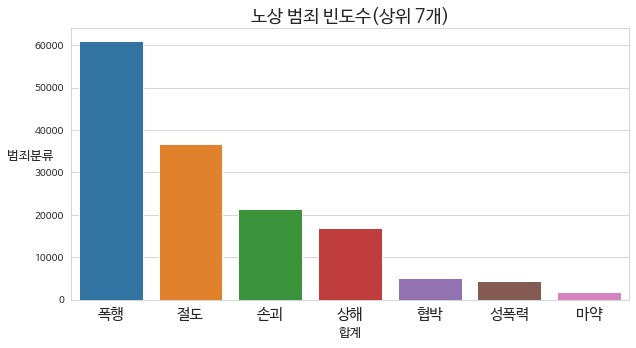

In [ ]:
road_list = road['범죄분류'].tolist()

plt.figure(figsize = (10,5))
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 지정(맑은 고딕)
plt.title('노상 범죄 빈도수(상위 7개)', fontsize = 18)

sns.barplot(data=road, x='범죄분류', y='합계', order=road_list[:7])
sns.set_style('whitegrid') # 그래프 스타일 지정
plt.xlabel('합계', fontsize = 13) # x축 제목 서식 설정
plt.ylabel('범죄분류', fontsize = 13, rotation=0) # y축 제목 서식 설정
plt.xticks(fontsize = 15) # x축 레이블 서식 설정
plt.yticks(fontsize = 10, rotation=0) # y축 레이블 서식 설정
plt.show()

In [ ]:
# 구별 범죄빈도수
origin_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/파이썬  프로젝트/범죄발생지.csv',encoding='euc-kr')
origin_df.head()

,범죄분류,서울_종로,서울_중구,서울_용산,서울_성동,서울_광진,서울_동대문,서울_중랑,서울_성북,서울_강북,...,시흥,파주,양산,이천,구리,서산,제천,논산,기타 도시,도시이외
0,절도,1488,1858,1133,998,1767,1453,1527,1162,1116,...,1714,1115,985,782,833,599,314,464,14421,8523
1,장물,12,11,8,2,10,5,7,5,3,...,7,7,2,4,0,2,0,0,45,12
2,사기,1761,2206,1535,1493,1703,1665,1497,1380,1591,...,2614,2312,1862,977,907,880,680,770,29401,14254
3,횡령,664,709,693,441,549,482,530,443,401,...,514,395,220,218,243,133,94,95,4678,2055
4,배임,61,75,40,32,30,35,18,26,23,...,33,48,33,22,13,23,22,14,718,370


In [ ]:
# 인덱스를 범죄분류로 변경 후 범죄분류열 삭제
origin_df.set_index(keys=origin_df['범죄분류'], inplace=True)
origin_df.drop(['범죄분류'], inplace=True, axis=1)
origin_df.head()

,서울_종로,서울_중구,서울_용산,서울_성동,서울_광진,서울_동대문,서울_중랑,서울_성북,서울_강북,서울_도봉,...,시흥,파주,양산,이천,구리,서산,제천,논산,기타 도시,도시이외
범죄분류,,,,,,,,,,,,,,,,,,,,,
절도,1488,1858,1133,998,1767,1453,1527,1162,1116,785,...,1714,1115,985,782,833,599,314,464,14421,8523
장물,12,11,8,2,10,5,7,5,3,17,...,7,7,2,4,0,2,0,0,45,12
사기,1761,2206,1535,1493,1703,1665,1497,1380,1591,1149,...,2614,2312,1862,977,907,880,680,770,29401,14254
횡령,664,709,693,441,549,482,530,443,401,314,...,514,395,220,218,243,133,94,95,4678,2055
배임,61,75,40,32,30,35,18,26,23,24,...,33,48,33,22,13,23,22,14,718,370


In [ ]:
# 합계 프레임 추가
df3 = origin_df.sum()
df3 = pd.DataFrame(df3)
df3.head()

,0
서울_종로,11700
서울_중구,12720
서울_용산,10820
서울_성동,8785
서울_광진,11289


In [ ]:
# 인덱스를 열로 변환
df3 = df3.reset_index()
df3.head()

,index,0
0,서울_종로,11700
1,서울_중구,12720
2,서울_용산,10820
3,서울_성동,8785
4,서울_광진,11289


In [ ]:
# 열 이름 변경하기
df3.rename(columns={'index':'발생지'},inplace=True)
df3.rename(columns={0:'합계'},inplace=True)
df3.head()

,발생지,합계
0,서울_종로,11700
1,서울_중구,12720
2,서울_용산,10820
3,서울_성동,8785
4,서울_광진,11289


In [ ]:
# 발생지가 서울인 데이터만 저장
true = df3['발생지'].str.contains("서울")
seoul = df3[true]
print(seoul)

       발생지     합계
0    서울_종로  11700
1    서울_중구  12720
2    서울_용산  10820
3    서울_성동   8785
4    서울_광진  11289
5   서울_동대문  11363
6    서울_중랑  11353
7    서울_성북   9465
8    서울_강북   9821
9    서울_도봉   7240
10   서울_노원  11615
11   서울_은평  10345
12  서울_서대문   8973
13   서울_마포  15886
14   서울_양천  10713
15   서울_강서  16009
16   서울_구로  13874
17   서울_금천  10448
18  서울_영등포  19142
19   서울_동작   9273
20   서울_관악  16088
21   서울_서초  21999
22   서울_강남  34757
23   서울_송파  20116
24   서울_강동  11003


In [ ]:
# '서울_' 제거
seoul['발생지'] = seoul["발생지"].str.replace('서울_', '')
seoul.head()

<ipython-input-584-99117502ad76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul['발생지'] = seoul["발생지"].str.replace('서울_', '')


,발생지,합계
0,종로,11700
1,중구,12720
2,용산,10820
3,성동,8785
4,광진,11289


In [ ]:
# 각 구 별 위도,경도 추가
seoul['위도'] = ['37.5735207', '37.563843', '37.532527', '37.563456', '37.538617', '37.574524', '37.6063242',
               '37.5894', '37.6397819', '37.668768', '37.654358', '37.602784', '37.579225', '37.5663245',
               '37.517016', '37.550937', '37.495472', '37.4568644', '37.526436', '37.51245', '37.4781549',
               '37.483569', '37.517305', '37.5145636', '37.530126']

<ipython-input-585-363f7ea0390c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul['위도'] = ['37.5735207', '37.563843', '37.532527', '37.563456', '37.538617', '37.574524', '37.6063242',


In [ ]:
seoul['경도'] = ['126.9788345', '126.997602', '126.99049', '127.036821', '127.082375', '127.03965', '127.0925842',
               '127.016749', '127.0256135', '127.047163', '127.056473', '126.929164', '126.9368', '126.901491',
               '126.866642', '126.849642', '126.887536', '126.8955105', '126.896004', '126.9395', '126.9514847',
               '127.032598', '127.047502', '127.1059186', '127.1237708']

<ipython-input-586-578916872c84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul['경도'] = ['126.9788345', '126.997602', '126.99049', '127.036821', '127.082375', '127.03965', '127.0925842',


In [ ]:
# 위도, 경도 숫자형으로 변환
seoul['위도'] = pd.to_numeric(seoul['위도'])
seoul['경도'] = pd.to_numeric(seoul['경도'])
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생지     25 non-null     object 
 1   합계      25 non-null     int64  
 2   위도      25 non-null     float64
 3   경도      25 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1000.0+ bytes


<ipython-input-587-e2900ba1283b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul['위도'] = pd.to_numeric(seoul['위도'])
<ipython-input-587-e2900ba1283b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul['경도'] = pd.to_numeric(seoul['경도'])


In [ ]:
# Map 함수를 사용하여 지도를 출력
map = folium.Map(location=[37.54203015999765, 126.98899020582488], zoom_start=12) 
# (location=[위도, 경도], zoom_start=초기화면의 크기)
map

In [ ]:
# 지역 정보를 set 함수를 사용하여 고유 지역을 뽑음
for region in set(seoul['발생지']):
    # 해당 지역의 범죄 발생횟수를 저장
    count = int(seoul[seoul['발생지'] == region]['합계'].values)
    latitude = float(seoul[seoul['발생지'] == region]['위도'].values)
    longitude = float(seoul[seoul['발생지'] == region]['경도'].values)
    # CircleMarker를 사용하여 지역마다 원형마커를 생성
    popup = folium.Popup(' '.join((region, str(count), '번')), min_width=80, max_width=100)
    marker = folium.CircleMarker([latitude, longitude], # 위치
                                  radius=count/1000 + 30,  # 범위
                                  color='#3186cc',            # 선 색상
                                  fill_color='#3186cc',       # 면 색상
                                  popup=popup) # 팝업 설정
    # 생성한 원형마커를 지도에 추가
    marker.add_to(map)

map